# FASHION MNIST MULTI CALSS ANALYSIS

<font size="4">IMPORT DATA WRANGLING AND VISUALIZATIONS LIBRARIES</font>

In [1]:
import numpy 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='muted')

<font size="4">IMPORT PRE-PROCESSING, MODELS,AND EVALUATION LIBRARIES</font>

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping 
from keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix 

In [3]:
# To fix random seed for reproducibility
seed = 88
numpy.random.seed(seed)

<font size="4">LOADING DATA</font>

In [4]:
#load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## EXPLORATORY ANALYSIS

In [6]:
# Print the shapes of the training and test sets
print("Training set shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", X_test.shape)
print("Test set dtypes:", X_test.dtype)
print("Test labels shape:", y_test.shape)
print("Test labels dtypes:", y_test.dtype)

Training set shape: (60000, 28, 28)
Training labels shape: (60000,)
Test set shape: (10000, 28, 28)
Test set dtypes: uint8
Test labels shape: (10000,)
Test labels dtypes: uint8


<font size="3">

X_train: NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.

y_train: NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.

X_test: NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.

y_test: NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.
    
</font>

In [7]:
# Explore X_train data
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


<font size="3">Data contains dark shaded images with many zeros </font>

In [8]:
# Explore X_train shape
print(X_train.shape)

(60000, 28, 28)


In [9]:
# Explore X_train shape
print(X_test.shape)

(10000, 28, 28)


In [10]:
# Expplore the shape of an image
print(X_train[0].shape)

(28, 28)


<font size="3"> Image size is 28 x 28 pixels </font>

In [11]:
# Explore min and max for X_train
ma= np.max(X_train)
mi= np.min(X_train)

print('Greyscale span over {} to {} range'.format(mi,ma))

Greyscale span over 0 to 255 range


In [12]:
print('min',mi,'max',ma)

min 0 max 255


In [13]:
#Explore y_train
print(y_train)

[9 0 0 ... 3 0 5]


In [14]:
#Explore y_train shape
print(y_train.shape)

(60000,)


In [15]:
y_labels = (set(y_train))# Unique classes

print('Data labels are with {} 10 classes'.format(y_labels))

Data labels are with {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} 10 classes


In [16]:
# Explore min and max for y_train
print(np.max(y_train))
print(np.min(y_train))

9
0


## DATA VISUALIZATION

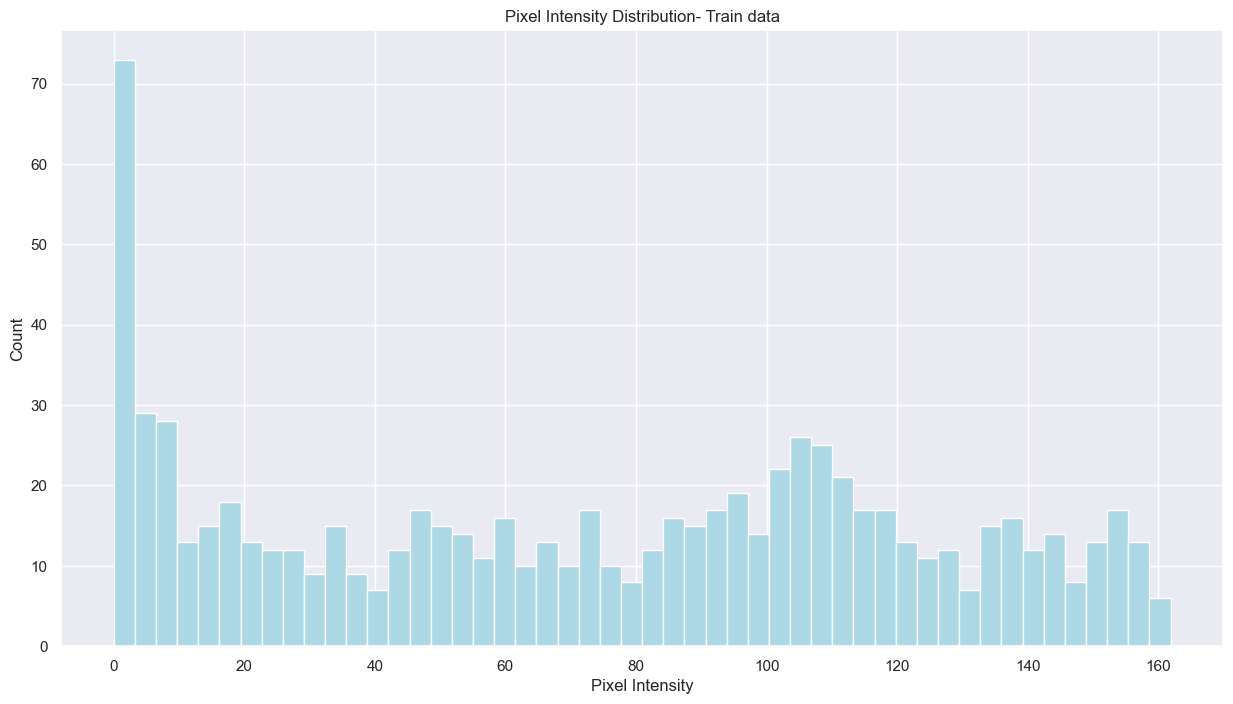

In [17]:
# Flatten the images and calculate the mean pixel intensity
X_train_flat = X_train.reshape(-1, 784)
pixel_means = np.mean(X_train_flat, axis=0) # Get the np mean of flattend X_train dataset

# Create a histogram to visualize the pixel intensity distribution
plt.figure(figsize=(15,8))
plt.hist(pixel_means, bins=50,color='lightblue') # Assogn bins and color
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.title('Pixel Intensity Distribution- Train data')
plt.show()

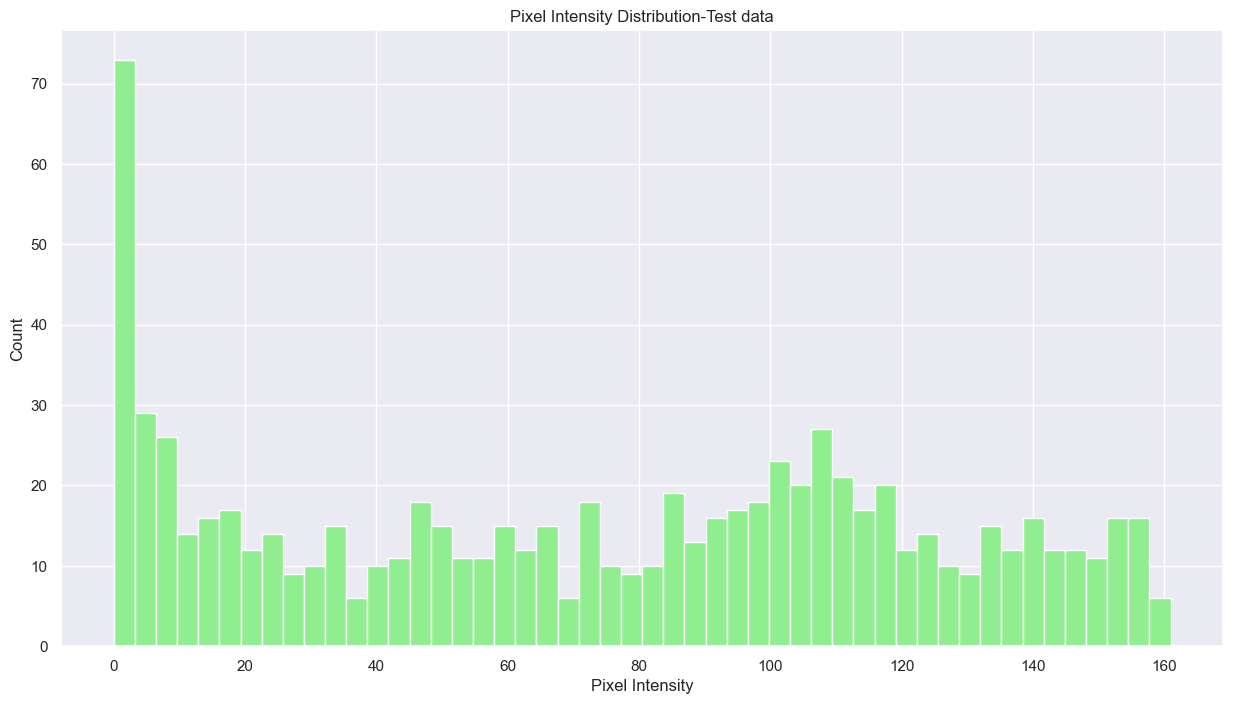

In [18]:
# Flatten the images and calculate the mean pixel intensity
X_test_flat = X_test.reshape(-1, 784)
pixel_means = np.mean(X_test_flat, axis=0) # Get the np mean of flattend X_test dataset

# Create a histogram to visualize the pixel intensity distribution
plt.figure(figsize=(15,8))
plt.hist(pixel_means, bins=50,color='lightgreen') # Assogn bins and color
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.title('Pixel Intensity Distribution-Test data')
plt.show()

<font size="3"> 
    
The histogram visual representation of pixel intensities are distributed across all the images in the dataset. It shows higher peaks are close to zero means that the majority of pixel intensities in the dataset are concentrated towards lower values. As explored earlier, the lower pixel intensities with zeros corresponds to darker regions, while higher pixel intensities correspond to brighter regions. 
    
</font>
    

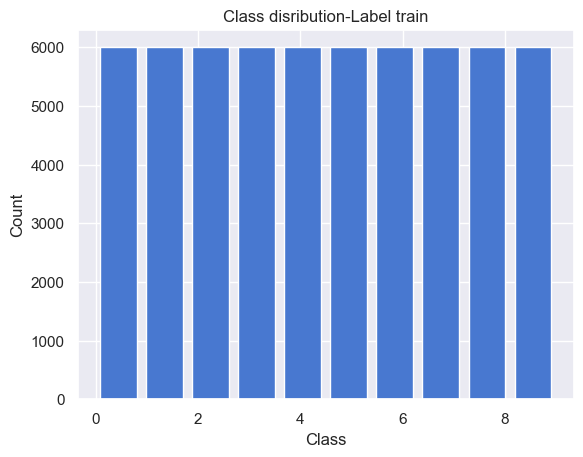

In [19]:
# Class distribution chart for y_train
plt.hist(y_train,rwidth=0.8)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class disribution-Label train')
plt.show()

<font size="3"> 
    
The train class labels are equally distributed with 6000 labels per class 
    
</font>

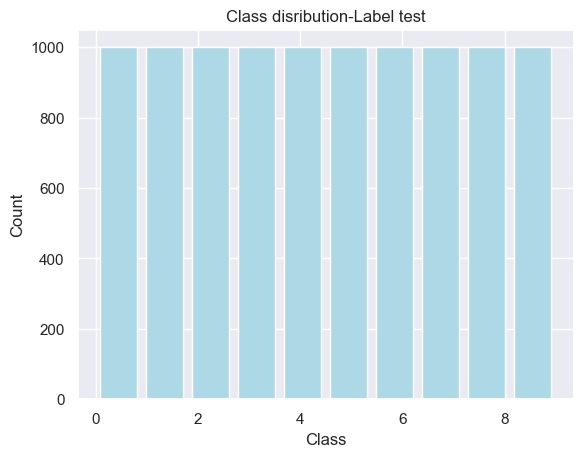

In [20]:
# Class distribution chart for y_test
plt.hist(y_test, rwidth=0.8,color='lightblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class disribution-Label test')
#x_ticks = plt.xticks()[0]
plt.show()

<font size="3"> 
    
The test class labels are equally distributed with 1000 labels per class 
    
</font>

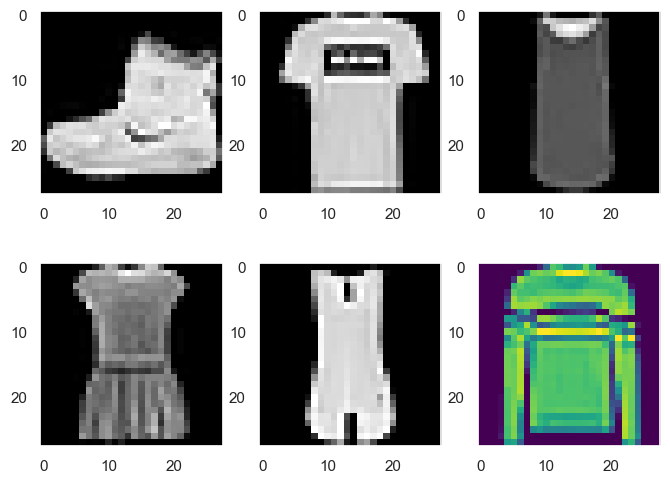

In [21]:
# Plot first 6 sample images with mix of grayscale and colorscale
plt.figure(figsize=(8,6))

plt.subplot(231)
plt.grid(False)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(232)
plt.grid(False)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(233)
plt.grid(False)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(234)
plt.grid(False)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(235)
plt.grid(False)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(236)
plt.grid(False)
plt.imshow(X_train[5], cmap=plt.get_cmap('viridis'))
plt.show()


<font size="3"> 
    
First 6 images with gray and color scale 
    
</font>

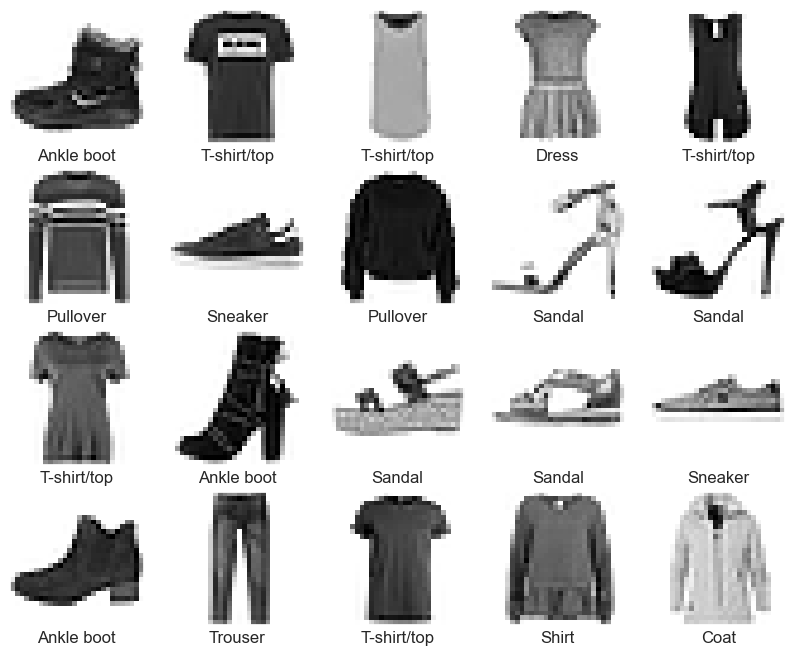

In [22]:
# Plot 20 images with maped names
plt.figure(figsize=(10,8))
for i in range(20): # for loop to show 20 images in 4 x 5 matrix
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

<font size="3"> 
    
Images with class names
    
</font>

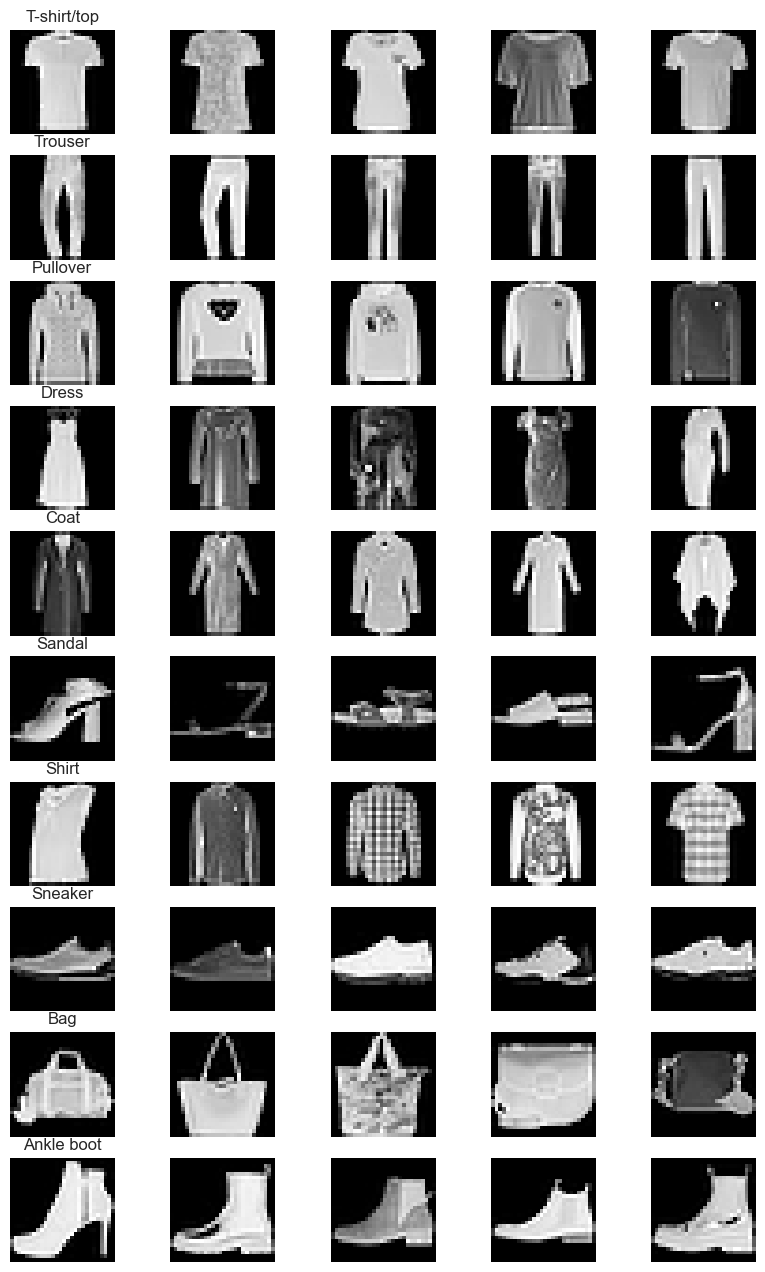

In [23]:
# Print 5 random images in each classes
# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Extract 5 random images per class 
examples_class = 5
fig, axes = plt.subplots(10, examples_class, figsize=(10, 16))

for i in range(10):
    class_index = np.where(y_train == i)[0]
    random_index = np.random.choice(class_index, size=examples_class, replace=False)
    
    for j, idx in enumerate(random_index):
        axes[i, j].imshow(X_train[idx], cmap='gray')
        axes[i, j].axis('off')
        
        if j == 0:
            axes[i, j].set_title(class_names[i])
plt.show()

<font size="3"> 
    
Explored different images  in the same classes
    
</font>

## RESHAPING AND SCALING

In [24]:
# Reshaing and scaling 
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

#print(X_train)
#print(X_test)

In [26]:
min= np.min(X_train)
max= np.max(X_train)
print('min',min,'max', max)

min 0.0 max 1.0


## ONE HOT ENCODING

In [27]:
# One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## BUILDING AND TRAINING: 7 CNN ARCHITECTURES

In [54]:
# Load the Fashion MNIST dataset
#(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data
#X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

#y_train = tf.keras.utils.to_categorical(y_train, 10)
#y_test = tf.keras.utils.to_categorical(y_test, 10)


In [55]:
# Build test CNN models
nets = 8
model = [0] *nets
names = ["J0", "J1", "J2", "J3", "J4", "J5","J6"]

j=0
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))

model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))

model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=1
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))

model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))

model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=2
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Dropout(0.4))

model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Dropout(0.4))

model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=3
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=4
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=5
model[j] = Sequential()

model[j].add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model[j].add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model[j].add(Conv2D(32, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))  # Changed strides to 1
model[j].add(BatchNormalization())
model[j].add(Dropout(0.25))

model[j].add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model[j].add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model[j].add(Conv2D(64, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))  # Changed strides to 1
model[j].add(BatchNormalization())
model[j].add(Dropout(0.25))

model[j].add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model[j].add(Conv2D(64, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))  # Changed strides to 1
model[j].add(BatchNormalization())
model[j].add(Dropout(0.25))

model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.25))

model[j].add(Dense(32, activation='relu'))
model[j].add(Dropout(0.25))

model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=6
model[j] = Sequential()

model[j] = Sequential()
model[j].add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model[j].add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Activation('relu'))
model[j].add(MaxPool2D(pool_size=(2, 2)))
model[j].add(Dropout(0.25))

model[j].add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model[j].add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Activation('relu'))
model[j].add(MaxPool2D(pool_size=(2, 2)))
model[j].add(Dropout(0.25))

model[j].add(Flatten())

model[j].add(Dense(256, activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Activation('relu'))

model[j].add(Dense(64, activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Activation('relu'))

model[j].add(Dense(10, activation='softmax'))

model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [56]:
from keras.callbacks import LearningRateScheduler

# learning rate reduction function
def scheduler(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 20:
        return 0.0005
    else:
        return 0.0001

# Create the schedelr callback
scheduling = LearningRateScheduler(scheduler)

history = [0] * nets
# history[]
epochs = 35

#for j in range(nets-1):
    #model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    #history[j] = model[j].fit(X_train,y_train, batch_size=64, epochs = epochs,  
        #validation_data = (X_test,y_test), callbacks=[scheduling], verbose=2)
    #print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        #names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))
    

Epoch 1/35
938/938 - 9s - loss: 0.6536 - accuracy: 0.7599 - val_loss: 0.4047 - val_accuracy: 0.8512 - lr: 0.0010 - 9s/epoch - 10ms/step
Epoch 2/35
938/938 - 9s - loss: 0.4322 - accuracy: 0.8431 - val_loss: 0.3496 - val_accuracy: 0.8725 - lr: 0.0010 - 9s/epoch - 9ms/step
Epoch 3/35
938/938 - 9s - loss: 0.3854 - accuracy: 0.8599 - val_loss: 0.3268 - val_accuracy: 0.8812 - lr: 0.0010 - 9s/epoch - 10ms/step
Epoch 4/35
938/938 - 9s - loss: 0.3547 - accuracy: 0.8703 - val_loss: 0.3048 - val_accuracy: 0.8865 - lr: 0.0010 - 9s/epoch - 10ms/step
Epoch 5/35
938/938 - 9s - loss: 0.3403 - accuracy: 0.8750 - val_loss: 0.2948 - val_accuracy: 0.8939 - lr: 0.0010 - 9s/epoch - 9ms/step
Epoch 6/35
938/938 - 9s - loss: 0.3261 - accuracy: 0.8817 - val_loss: 0.2844 - val_accuracy: 0.8951 - lr: 0.0010 - 9s/epoch - 9ms/step
Epoch 7/35
938/938 - 9s - loss: 0.3149 - accuracy: 0.8841 - val_loss: 0.2758 - val_accuracy: 0.9010 - lr: 0.0010 - 9s/epoch - 9ms/step
Epoch 8/35
938/938 - 9s - loss: 0.3066 - accuracy: 0

Epoch 25/35
938/938 - 11s - loss: 0.1769 - accuracy: 0.9341 - val_loss: 0.1918 - val_accuracy: 0.9301 - lr: 1.0000e-04 - 11s/epoch - 12ms/step
Epoch 26/35
938/938 - 11s - loss: 0.1748 - accuracy: 0.9351 - val_loss: 0.1944 - val_accuracy: 0.9297 - lr: 1.0000e-04 - 11s/epoch - 12ms/step
Epoch 27/35
938/938 - 11s - loss: 0.1738 - accuracy: 0.9345 - val_loss: 0.1930 - val_accuracy: 0.9293 - lr: 1.0000e-04 - 11s/epoch - 12ms/step
Epoch 28/35
938/938 - 11s - loss: 0.1763 - accuracy: 0.9342 - val_loss: 0.1908 - val_accuracy: 0.9303 - lr: 1.0000e-04 - 11s/epoch - 12ms/step
Epoch 29/35
938/938 - 11s - loss: 0.1725 - accuracy: 0.9356 - val_loss: 0.1927 - val_accuracy: 0.9313 - lr: 1.0000e-04 - 11s/epoch - 11ms/step
Epoch 30/35
938/938 - 11s - loss: 0.1744 - accuracy: 0.9352 - val_loss: 0.1920 - val_accuracy: 0.9315 - lr: 1.0000e-04 - 11s/epoch - 12ms/step
Epoch 31/35
938/938 - 11s - loss: 0.1718 - accuracy: 0.9364 - val_loss: 0.1903 - val_accuracy: 0.9311 - lr: 1.0000e-04 - 11s/epoch - 12ms/step

Epoch 12/35
938/938 - 16s - loss: 0.1699 - accuracy: 0.9372 - val_loss: 0.2085 - val_accuracy: 0.9259 - lr: 5.0000e-04 - 16s/epoch - 17ms/step
Epoch 13/35
938/938 - 16s - loss: 0.1620 - accuracy: 0.9393 - val_loss: 0.2038 - val_accuracy: 0.9301 - lr: 5.0000e-04 - 16s/epoch - 17ms/step
Epoch 14/35
938/938 - 16s - loss: 0.1574 - accuracy: 0.9416 - val_loss: 0.1988 - val_accuracy: 0.9315 - lr: 5.0000e-04 - 16s/epoch - 17ms/step
Epoch 15/35
938/938 - 16s - loss: 0.1530 - accuracy: 0.9434 - val_loss: 0.1991 - val_accuracy: 0.9316 - lr: 5.0000e-04 - 16s/epoch - 17ms/step
Epoch 16/35
938/938 - 16s - loss: 0.1464 - accuracy: 0.9463 - val_loss: 0.2041 - val_accuracy: 0.9299 - lr: 5.0000e-04 - 16s/epoch - 17ms/step
Epoch 17/35
938/938 - 15s - loss: 0.1432 - accuracy: 0.9466 - val_loss: 0.2011 - val_accuracy: 0.9319 - lr: 5.0000e-04 - 15s/epoch - 16ms/step
Epoch 18/35
938/938 - 16s - loss: 0.1381 - accuracy: 0.9492 - val_loss: 0.2048 - val_accuracy: 0.9321 - lr: 5.0000e-04 - 16s/epoch - 17ms/step

Epoch 35/35
938/938 - 18s - loss: 0.0698 - accuracy: 0.9739 - val_loss: 0.2193 - val_accuracy: 0.9391 - lr: 1.0000e-04 - 18s/epoch - 19ms/step
CNN J4: Epochs=35, Train accuracy=0.97428, Validation accuracy=0.93930
Epoch 1/35
938/938 - 28s - loss: 0.7119 - accuracy: 0.7510 - val_loss: 0.4174 - val_accuracy: 0.8488 - lr: 0.0010 - 28s/epoch - 30ms/step
Epoch 2/35
938/938 - 27s - loss: 0.4283 - accuracy: 0.8520 - val_loss: 0.3244 - val_accuracy: 0.8853 - lr: 0.0010 - 27s/epoch - 28ms/step
Epoch 3/35
938/938 - 27s - loss: 0.3595 - accuracy: 0.8758 - val_loss: 0.3234 - val_accuracy: 0.8888 - lr: 0.0010 - 27s/epoch - 28ms/step
Epoch 4/35
938/938 - 27s - loss: 0.3269 - accuracy: 0.8886 - val_loss: 0.2847 - val_accuracy: 0.8972 - lr: 0.0010 - 27s/epoch - 29ms/step
Epoch 5/35
938/938 - 27s - loss: 0.2978 - accuracy: 0.8959 - val_loss: 0.2982 - val_accuracy: 0.8942 - lr: 0.0010 - 27s/epoch - 29ms/step
Epoch 6/35
938/938 - 27s - loss: 0.2799 - accuracy: 0.9017 - val_loss: 0.2751 - val_accuracy: 0.

Epoch 22/35
938/938 - 27s - loss: 0.0709 - accuracy: 0.9750 - val_loss: 0.3410 - val_accuracy: 0.9280 - lr: 1.0000e-04 - 27s/epoch - 29ms/step
Epoch 23/35
938/938 - 27s - loss: 0.0681 - accuracy: 0.9754 - val_loss: 0.3529 - val_accuracy: 0.9266 - lr: 1.0000e-04 - 27s/epoch - 29ms/step
Epoch 24/35
938/938 - 27s - loss: 0.0624 - accuracy: 0.9778 - val_loss: 0.3658 - val_accuracy: 0.9279 - lr: 1.0000e-04 - 27s/epoch - 29ms/step
Epoch 25/35
938/938 - 28s - loss: 0.0630 - accuracy: 0.9780 - val_loss: 0.3614 - val_accuracy: 0.9290 - lr: 1.0000e-04 - 28s/epoch - 29ms/step
Epoch 26/35
938/938 - 27s - loss: 0.0583 - accuracy: 0.9792 - val_loss: 0.3763 - val_accuracy: 0.9275 - lr: 1.0000e-04 - 27s/epoch - 29ms/step
Epoch 27/35
938/938 - 27s - loss: 0.0560 - accuracy: 0.9798 - val_loss: 0.3760 - val_accuracy: 0.9267 - lr: 1.0000e-04 - 27s/epoch - 29ms/step
Epoch 28/35
938/938 - 27s - loss: 0.0565 - accuracy: 0.9796 - val_loss: 0.3929 - val_accuracy: 0.9273 - lr: 1.0000e-04 - 27s/epoch - 29ms/step

In [60]:
nets = 7

# Create more training images via data augmentation
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range=0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)


# Train a J5 architecture with data augmentation
#j = nets - 2
#history[j] = model[j].fit(datagen.flow(X_train, y_train, batch_size=64), 
    #epochs=epochs, steps_per_epoch=X_train.shape[0] // 64,
    #validation_data=(X_test, y_test), verbose=2)

#print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
    #names[j], epochs, max(history[j].history['accuracy']), max(history[j].history['val_accuracy'])))

Epoch 1/35
937/937 - 29s - loss: 0.7091 - accuracy: 0.7720 - val_loss: 0.2559 - val_accuracy: 0.9190 - 29s/epoch - 31ms/step
Epoch 2/35
937/937 - 30s - loss: 0.5441 - accuracy: 0.8130 - val_loss: 0.2574 - val_accuracy: 0.9172 - 30s/epoch - 32ms/step
Epoch 3/35
937/937 - 30s - loss: 0.4932 - accuracy: 0.8313 - val_loss: 0.2532 - val_accuracy: 0.9187 - 30s/epoch - 32ms/step
Epoch 4/35
937/937 - 29s - loss: 0.4655 - accuracy: 0.8411 - val_loss: 0.2518 - val_accuracy: 0.9173 - 29s/epoch - 31ms/step
Epoch 5/35
937/937 - 28s - loss: 0.4322 - accuracy: 0.8516 - val_loss: 0.2471 - val_accuracy: 0.9170 - 28s/epoch - 30ms/step
Epoch 6/35
937/937 - 29s - loss: 0.4204 - accuracy: 0.8550 - val_loss: 0.2478 - val_accuracy: 0.9174 - 29s/epoch - 31ms/step
Epoch 7/35
937/937 - 30s - loss: 0.4022 - accuracy: 0.8615 - val_loss: 0.2373 - val_accuracy: 0.9190 - 30s/epoch - 32ms/step
Epoch 8/35
937/937 - 28s - loss: 0.3862 - accuracy: 0.8642 - val_loss: 0.2420 - val_accuracy: 0.9217 - 28s/epoch - 30ms/step


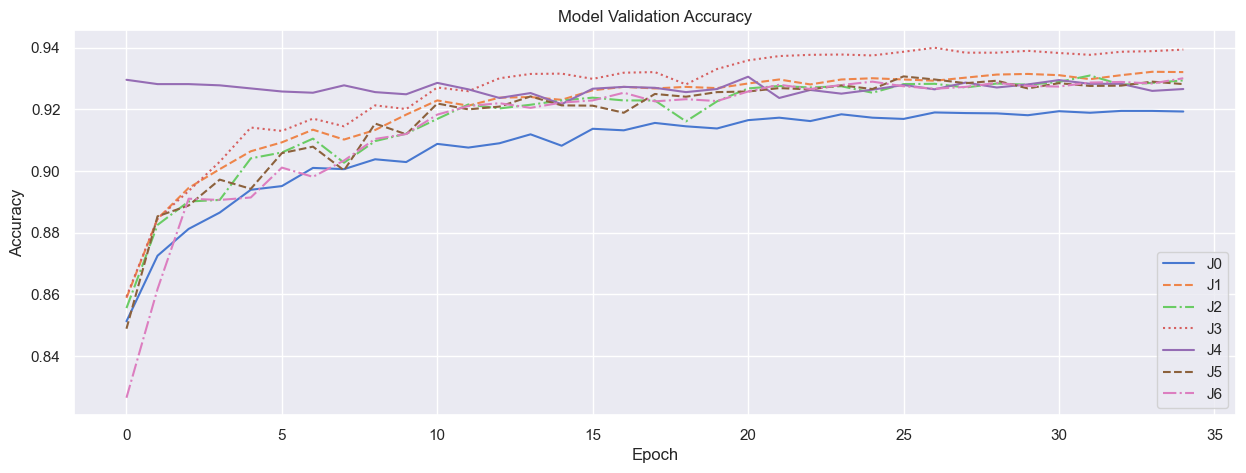

In [59]:
# Print CNN test accuracy chart
# set line styles
styles = ['-', '--', '-.', ':', '-', '--', '-.']

# Plot validation accuracy
plt.figure(figsize=(15, 5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'], linestyle=styles[i])

plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(names)
plt.show()

<font size="3"> 

The high-performing CNN architecture J3 has achieved a validation accuracy of 94%. This can be attributed to the integration of batch normalization, dropout regularization, and data augmentation techniques. 
    
The architecture of J3 is outlined as follows:

Convolutional Layers with Filters (32):

Comprises three consecutive convolutional layers, each with 32 filters.
The first two layers with a 3x3 kernel size to capture intricate patterns.
The third layer utilizes a 5x5 kernel with a stride of 2, contributing to spatial reduction.
    
Convolutional Layers with Filters (64):

Same as the earlier layers in terms of kernel size and stride configuration.
    
Flattened Fully Connected Dense Layer (128 neurons):

This aids in recognizing complex relationships within the features extracted.
    
Output Layer (10 neurons):

The output layer is with 10 neurons, corresponding directly to the classification classes.

 </font>

# CNN MODEL TRAINING  WITH MODIFICATIONS

## IMAGE GENERATOR

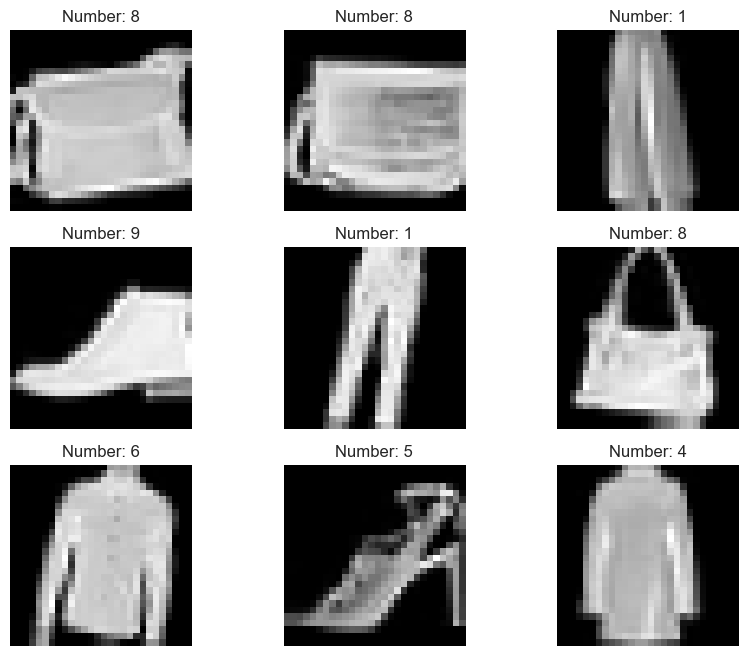

In [28]:
# Image genrator with modified image shapes

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.10,
    zoom_range=0.05,
    zca_whitening=False,
    horizontal_flip=False,
    vertical_flip=False,  
    fill_mode='nearest'
)

datagen.fit(X_train)

# Display generated images for the first batch size 9
b_size = 9
modified_images = datagen.flow(X_train, y_train, batch_size=b_size)
plt.figure(figsize=(10, 8))

for i in range(b_size): # iterate ove the batch size and plot into 3x3 matrix
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.imshow(modified_images[0][0][i][:, :, 0], cmap='gray')
    plt.title('Number: ' + str(np.argmax(modified_images[0][1][i])))

plt.show()


<font size="3"> 
    
The original images in this dataset are transformed like rotation, shifting, zooming, flipping, brightness adjustments, and modifications as shown above images.
    
These augmentations are used to increase the variability and diversity of the dataset without collecting new images.
    
Augmentation is a common technique used in machine learning and deep learning tasks to improve the performance and generalization of models. Let us witness later.
    
</font>

## LEARNING RATE SCHEDULER

In [89]:
# Schedule learing rate with predefined epochs intervals

def scheduler(epoch, lr):
    if epoch < 15:  # For the first 15 epochs, the learning rate is not changed
        return lr
    elif 15 <= epoch < 30:  # After fifteen, it decreases exponentially
        return lr * math.exp(-0.1)
    elif 30 <= epoch < 45:  # After thirty, it decreases exponentially
        return lr * math.exp(-0.2)
    elif 45 <= epoch < 60:  # After forty-five, it decreases exponentially
        return lr * math.exp(-0.3)
    elif 60 <= epoch < 75:  # After sixty, it decreases exponentially
        return lr * math.exp(-0.4)
    elif 75 <= epoch < 90:  # After seventy-five, it decreases exponentially
        return lr * math.exp(-0.5)
    else:
        return lr * math.exp(-0.6)  # And then decreases even more, still exponentially

LRScheduler = LearningRateScheduler(scheduler)


## MODEL 1 (CNN Architecture 1 - with augmentation)

In [90]:
# Define the CNN model(modified)
model1 = Sequential()

# Convolutional layers block 1
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(32, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))  # Changed strides to 1
model1.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# Convolutional layers block 2
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(64, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))  # Changed strides to 1
model1.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# Convolutional layers block 3
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(64, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))  # Changed strides to 1
model1.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# Flatten and fully connected layers
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.25))

model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.25))

# Output layer
model1.add(Dense(10, activation='softmax'))

model1.summary()

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])



Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_304 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 conv2d_305 (Conv2D)         (None, 24, 24, 32)        9248      
                                                                 
 conv2d_306 (Conv2D)         (None, 24, 24, 32)        25632     
                                                                 
 batch_normalization_152 (Ba  (None, 24, 24, 32)       128       
 tchNormalization)                                               
                                                                 
 dropout_200 (Dropout)       (None, 24, 24, 32)        0         
                                                                 
 conv2d_307 (Conv2D)         (None, 22, 22, 64)        18496     
                                                     

<font size="3"> 

Modified version of CNN J3

Input Layer (784):

The input layer has 784 neurons corresponds to a 28x28 pixel grayscale image. Each pixel is treated as a separate input neuron, and the total number of inputs is 28x28 = 784.
    
First Convolutional Block:
    
The first convolutional layer has 32 filters with a kernel size of 3x3. This layer applies 32 different 3x3 filters to the input image to extract features from the data.
    
The second convolutional layer also has 32 filters with a kernel size of 3x3. This layer further extracts features from the outputs of the previous layer.
    
The third convolutional layer has 32 filters with a kernel size of 5x5 and a stride of 1. The stride of 1 means that the filter moves 1 pixels at a time while scanning the input. This results in down-sampling the feature maps and reducing their dimensions.

Second Convolutional Block:
    
The fourth convolutional layer has 64 filters with a kernel size of 3x3. This layer performs additional feature extraction on the down-sampled feature maps from the previous block.
    
The fifth convolutional layer also has 64 filters with a kernel size of 3x3. This layer further extracts features from the outputs of the previous layer.
    
Third Convolutional Block:
    
The fifth convolutional layer has 64 filters with a kernel size of 3x3. This layer performs additional feature extraction on the down-sampled feature maps from the previous block.
    
The Sixth convolutional layer also has 64 filters with a kernel size of 3x3. This layer further extracts features from the outputs of the previous layer.
    
Fully Connected Layers:
    
After the convolutional blocks, there are 2 fully connected layer with 128 neurons and 32 neurons. This layers serves as a "flattened" representation of the extracted features, enabling the network to learn complex patterns and relationships between the features.
    
The final output layer has 10 neurons, each representing one of the possible classes in the classification task. 
    
    
</font>

In [91]:
epoch = 100 # Number of time the model will see the data
batch = 16 # Number of images per batch
step = X_train.shape[0] // batch # Steps per epoch
callback = [LRScheduler,] 

# Fitting the model:
#model1_history = model1.fit(datagen.flow(X_train,y_train, batch_size= batch),
                              #epochs = epoch, 
                              #validation_data = (X_test,y_test),
                              #verbose = 2,
                              #steps_per_epoch= step,
                              #callbacks=callback)

Epoch 1/100
3750/3750 - 75s - loss: 0.8713 - acc: 0.6864 - val_loss: 0.5318 - val_acc: 0.7880 - lr: 0.0010 - 75s/epoch - 20ms/step
Epoch 2/100
3750/3750 - 70s - loss: 0.6082 - acc: 0.7740 - val_loss: 0.4301 - val_acc: 0.8406 - lr: 0.0010 - 70s/epoch - 19ms/step
Epoch 3/100
3750/3750 - 69s - loss: 0.5203 - acc: 0.8125 - val_loss: 0.4359 - val_acc: 0.8330 - lr: 0.0010 - 69s/epoch - 18ms/step
Epoch 4/100
3750/3750 - 68s - loss: 0.4667 - acc: 0.8361 - val_loss: 0.3356 - val_acc: 0.8779 - lr: 0.0010 - 68s/epoch - 18ms/step
Epoch 5/100
3750/3750 - 68s - loss: 0.4295 - acc: 0.8486 - val_loss: 0.3261 - val_acc: 0.8836 - lr: 0.0010 - 68s/epoch - 18ms/step
Epoch 6/100
3750/3750 - 67s - loss: 0.4077 - acc: 0.8577 - val_loss: 0.3153 - val_acc: 0.8867 - lr: 0.0010 - 67s/epoch - 18ms/step
Epoch 7/100
3750/3750 - 69s - loss: 0.3890 - acc: 0.8623 - val_loss: 0.2988 - val_acc: 0.8922 - lr: 0.0010 - 69s/epoch - 19ms/step
Epoch 8/100
3750/3750 - 68s - loss: 0.3686 - acc: 0.8698 - val_loss: 0.3082 - val_a

Epoch 62/100
3750/3750 - 67s - loss: 0.1976 - acc: 0.9310 - val_loss: 0.2054 - val_acc: 0.9308 - lr: 5.5452e-08 - 67s/epoch - 18ms/step
Epoch 63/100
3750/3750 - 68s - loss: 0.1976 - acc: 0.9309 - val_loss: 0.2047 - val_acc: 0.9314 - lr: 3.7170e-08 - 68s/epoch - 18ms/step
Epoch 64/100
3750/3750 - 67s - loss: 0.1983 - acc: 0.9306 - val_loss: 0.2055 - val_acc: 0.9311 - lr: 2.4916e-08 - 67s/epoch - 18ms/step
Epoch 65/100
3750/3750 - 68s - loss: 0.1967 - acc: 0.9307 - val_loss: 0.2055 - val_acc: 0.9309 - lr: 1.6702e-08 - 68s/epoch - 18ms/step
Epoch 66/100
3750/3750 - 72s - loss: 0.1973 - acc: 0.9306 - val_loss: 0.2054 - val_acc: 0.9311 - lr: 1.1195e-08 - 72s/epoch - 19ms/step
Epoch 67/100
3750/3750 - 68s - loss: 0.2014 - acc: 0.9288 - val_loss: 0.2051 - val_acc: 0.9309 - lr: 7.5046e-09 - 68s/epoch - 18ms/step
Epoch 68/100
3750/3750 - 68s - loss: 0.1994 - acc: 0.9291 - val_loss: 0.2054 - val_acc: 0.9310 - lr: 5.0305e-09 - 68s/epoch - 18ms/step
Epoch 69/100
3750/3750 - 67s - loss: 0.1950 - ac

In [29]:
# Check model accuracy
loss, accuracy = model1.evaluate(X_test, y_test)
print('Test loss:', round(loss,4))
print('Test accuracy:', round(accuracy,4))
print('Test accuracy:{:.2f}%'.format(accuracy*100))

313/313 [==============================] - 3s 9ms/step - loss: 0.2002 - acc: 0.9331
Test loss: 0.2002
Test accuracy: 0.9331
Test accuracy:93.31%


In [30]:
# Check CNN error 
scores = model1.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 6.69%


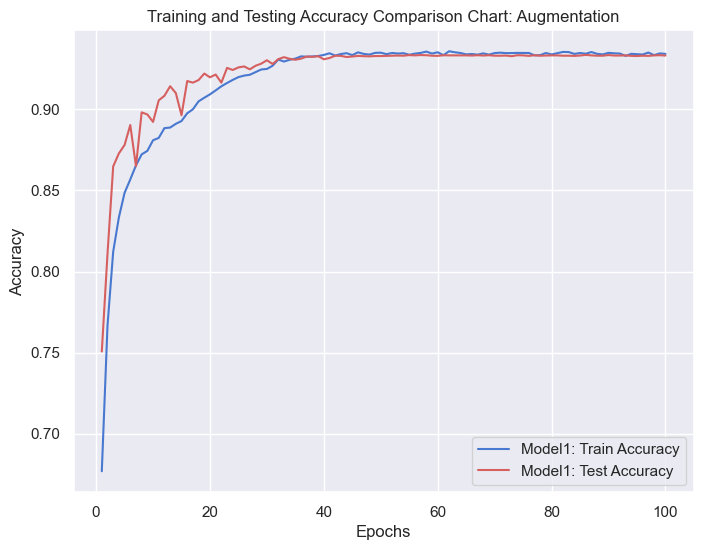

In [31]:
# Generating train and test accuracy comparison chart for model1
# Assigned tarin amd test accuracies
train_accuracy_model1 = model1_history.history['acc']
test_accuracy_model1 = model1_history.history['val_acc']

# Plot chart
plt.figure(figsize=(8, 6))
epochs = range(1, len(train_accuracy_model1) + 1) # Iterate over the number of epochs

plt.plot(epochs, train_accuracy_model1, 'b', label='Model1: Train Accuracy') # Plot train accuracy with blue color
plt.plot(epochs, test_accuracy_model1, 'r', label='Model1: Test Accuracy') # Plot test accuracy with red color
plt.title('Training and Testing Accuracy Comparison Chart: Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

<font size="3"> 
    
The training and testing accuracy show a gradual increase until around 40 epochs, after which they remain almost constant. It is evident that testing accuracy did not rise as smoothly as training accuracy until 40 epochs, while training accuracy showed slight fluctuations throughout the entire 100 epochs. Initially, there was some overfitting, but it stabilized with a final accuracy of 93.31%.
    
</font>

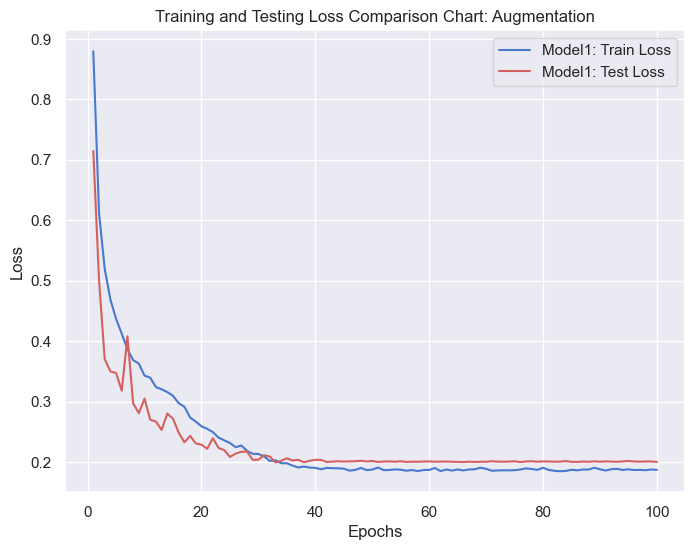

In [32]:
# Generating train and test loss comparison chart for model1
# Assigned tarin amd test loss

train_loss_model1 = model1_history.history['loss']
test_loss_model1 = model1_history.history['val_loss']

# Plot chart
plt.figure(figsize=(8, 6))
epochs = range(1, len(train_loss_model1) + 1) # Iterate over number of epochs

plt.plot(epochs, train_loss_model1, 'b', label='Model1: Train Loss')
plt.plot(epochs, test_loss_model1, 'r', label='Model1: Test Loss')
plt.title('Training and Testing Loss Comparison Chart: Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

<font size="3"> 
    
The training and test loss exhibited a similar pattern as the accuracy. The test loss reached a value of approximately 0.2 and remained constant after 40 epochs. Towards the end, specifically after 30 epochs, the training loss was slightly lower than the test loss. 
    
</font>

## MODEL 2 (CNN Architecture 1 - without augmentation)

In [33]:
# Define the CNN model(modified)
model2 = Sequential()

# Convolutional layers block 1
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model2.add(Conv2D(32, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))  # Changed strides to 1
model2.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# Convolutional layers block 2
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(Conv2D(64, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))  # Changed strides to 1
model2.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# Convolutional layers block 3
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(Conv2D(64, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))  # Changed strides to 1
model2.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# Flatten and fully connected layers
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))

model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.25))

# Output layer
model2.add(Dense(10, activation='softmax'))

model2.summary()

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        25632     
                                                                 
 batch_normalization_3 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 64)        18496     
                                                      

In [34]:
epoch = 100 # Number of time the model will see the data
batch = 16 # Number of images per batch
step = X_train.shape[0] // batch # Steps per epoch
callback = [LRScheduler,] 

# Fitting the model:
#model2_history = model2.fit(X_train,y_train, batch_size= batch,
                              #epochs = epoch, 
                              #validation_data = (X_test,y_test),
                              #verbose = 2,
                              #steps_per_epoch= step,
                              #callbacks=callback)

Epoch 1/100
3750/3750 - 64s - loss: 0.7439 - acc: 0.7266 - val_loss: 0.4842 - val_acc: 0.8260 - lr: 0.0010 - 64s/epoch - 17ms/step
Epoch 2/100
3750/3750 - 61s - loss: 0.4872 - acc: 0.8274 - val_loss: 0.4351 - val_acc: 0.8423 - lr: 0.0010 - 61s/epoch - 16ms/step
Epoch 3/100
3750/3750 - 60s - loss: 0.4032 - acc: 0.8602 - val_loss: 0.3345 - val_acc: 0.8829 - lr: 0.0010 - 60s/epoch - 16ms/step
Epoch 4/100
3750/3750 - 61s - loss: 0.3527 - acc: 0.8777 - val_loss: 0.3352 - val_acc: 0.8895 - lr: 0.0010 - 61s/epoch - 16ms/step
Epoch 5/100
3750/3750 - 61s - loss: 0.3200 - acc: 0.8884 - val_loss: 0.2866 - val_acc: 0.8987 - lr: 0.0010 - 61s/epoch - 16ms/step
Epoch 6/100
3750/3750 - 72s - loss: 0.2958 - acc: 0.8973 - val_loss: 0.2767 - val_acc: 0.9043 - lr: 0.0010 - 72s/epoch - 19ms/step
Epoch 7/100
3750/3750 - 68s - loss: 0.2714 - acc: 0.9046 - val_loss: 0.2885 - val_acc: 0.9094 - lr: 0.0010 - 68s/epoch - 18ms/step
Epoch 8/100
3750/3750 - 58s - loss: 0.2566 - acc: 0.9108 - val_loss: 0.2573 - val_a

Epoch 62/100
3750/3750 - 59s - loss: 0.0458 - acc: 0.9833 - val_loss: 0.4869 - val_acc: 0.9279 - lr: 5.5452e-08 - 59s/epoch - 16ms/step
Epoch 63/100
3750/3750 - 60s - loss: 0.0469 - acc: 0.9832 - val_loss: 0.4938 - val_acc: 0.9280 - lr: 3.7170e-08 - 60s/epoch - 16ms/step
Epoch 64/100
3750/3750 - 60s - loss: 0.0463 - acc: 0.9834 - val_loss: 0.4893 - val_acc: 0.9277 - lr: 2.4916e-08 - 60s/epoch - 16ms/step
Epoch 65/100
3750/3750 - 61s - loss: 0.0493 - acc: 0.9822 - val_loss: 0.4913 - val_acc: 0.9269 - lr: 1.6702e-08 - 61s/epoch - 16ms/step
Epoch 66/100
3750/3750 - 60s - loss: 0.0476 - acc: 0.9829 - val_loss: 0.4888 - val_acc: 0.9276 - lr: 1.1195e-08 - 60s/epoch - 16ms/step
Epoch 67/100
3750/3750 - 61s - loss: 0.0478 - acc: 0.9829 - val_loss: 0.4902 - val_acc: 0.9276 - lr: 7.5046e-09 - 61s/epoch - 16ms/step
Epoch 68/100
3750/3750 - 61s - loss: 0.0485 - acc: 0.9830 - val_loss: 0.4882 - val_acc: 0.9272 - lr: 5.0305e-09 - 61s/epoch - 16ms/step
Epoch 69/100
3750/3750 - 59s - loss: 0.0485 - ac

In [35]:
# Check model accuracy
loss, accuracy = model2.evaluate(X_test, y_test)
print('Test loss:', round(loss,4))
print('Test accuracy:', round(accuracy,4))
print('Test accuracy:{:.2f}%'.format(accuracy*100))

313/313 [==============================] - 3s 9ms/step - loss: 0.4893 - acc: 0.9277
Test loss: 0.4893
Test accuracy: 0.9277
Test accuracy:92.77%


In [36]:
# Check CNN error 
scores = model2.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 7.23%


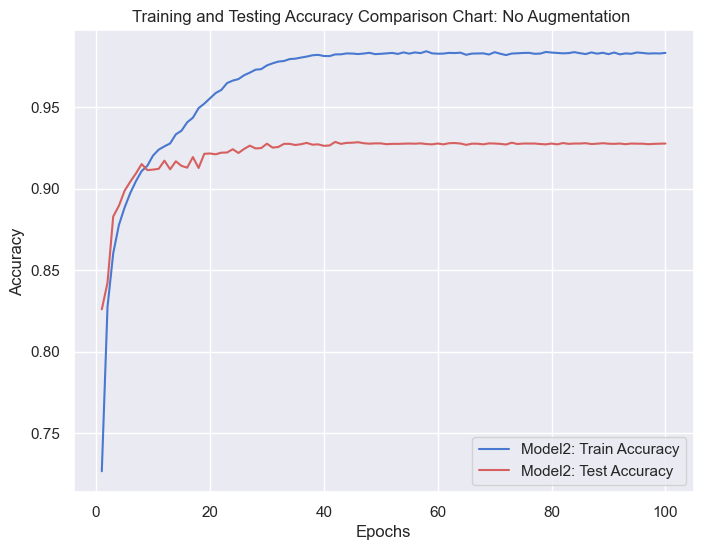

In [37]:
# Generating train and test accuracy comparison chart for model1
# Assigned tarin amd test accuracies
train_accuracy_model2 = model2_history.history['acc']
test_accuracy_model2 = model2_history.history['val_acc']

# Plot chart
plt.figure(figsize=(8, 6))
epochs = range(1, len(train_accuracy_model2) + 1) # Iterate over the number of epochs

plt.plot(epochs, train_accuracy_model2, 'b', label='Model2: Train Accuracy') # Plot train accuracy with blue color
plt.plot(epochs, test_accuracy_model2, 'r', label='Model2: Test Accuracy') # Plot test accuracy with red color
plt.title('Training and Testing Accuracy Comparison Chart: No Augmentation ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

<font size="3"> 
    
The training and testing accuracy exhibit a gradual increase until approximately 40 epochs, after which they remain constant. The training accuracy rises smoothly throughout the entire 100 epochs, while testing accuracy shows slight fluctuations up to 40 epochs. Evidently, overfitting occurs, resulting in a final accuracy of 92.77%.
    
</font>

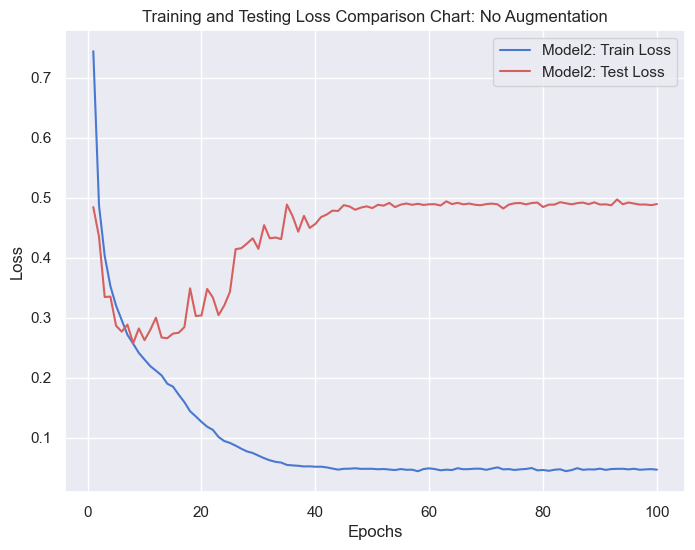

In [38]:
# Generating train and test loss comparison chart for model1
# Assigned tarin amd test loss

train_loss_model2 = model2_history.history['loss']
test_loss_model2 = model2_history.history['val_loss']

# Plot chart
plt.figure(figsize=(8, 6))
epochs = range(1, len(train_loss_model2) + 1) # Iterate over number of epochs

plt.plot(epochs, train_loss_model2, 'b', label='Model2: Train Loss')
plt.plot(epochs, test_loss_model2, 'r', label='Model2: Test Loss')
plt.title('Training and Testing Loss Comparison Chart: No Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

<font size="3"> 
    
The training and test loss exhibit distinct patterns. The test loss decreases until 10 epochs and then increases, remaining constant after 40 epochs. The evident variation in augmentation effects is apparent here.
    
</font>

## MODEL 3 (CNN Architecture 2 - with augmentation)

In [171]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation 
# Define model2

model3 = Sequential()
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())

model3.add(Dense(256, activation='relu'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))

model3.add(Dense(64, activation='relu'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))

model3.add(Dense(10, activation='softmax'))

model3.summary()

model3.compile(optimizer ='adam' , loss = "categorical_crossentropy", metrics=["acc"])



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_33 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_12 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout_20 (Dropout)        (None, 12, 12, 64)       

<font size="3"> 
    
Input Layer: The input shape is (28, 28, 1), input images are grayscale with dimensions 28x28 pixels.

Convolutional block1:
The first Conv2D layer has 64 filters with a kernel size of (3, 3).
    
The second Conv2D layer also has 64 filters with a (3, 3) kernel size.
    
Batch Normalization and Activation: After each Conv2D layer, Batch Normalization is applied, followed by ReLU activation.
    
MaxPooling Layer: A MaxPooling2D layer with a pool size of (2, 2) is used to downsample
    
Dropout: A Dropout layer with a rate of 0.25 is used to prevent overfitting.

Convolutional block2:
Another two sets of Convolutional layers with increased filters (128) in each layer.
    
Flattening: The feature maps are flattened into a 1D vector to be fed into the dense layers.
    
Dense Layers: The flattened features are passed through Dense, fully connected layers.
    
The first Dense layer has 256 neurons with ReLU activation, followed by Batch Normalization and ReLU activation.
    
The second Dense layer has 64 neurons with ReLU activation, Batch Normalization, and ReLU activation.

Output Layer: The final Dense layer has 10 neurons, representing the number of classes in the classification task. It uses the softmax activation function to produce probability scores for each class.
    
</font>

In [172]:
epoch = 100 # Number of time the model will see the data
batch = 16 # Number of images per batch
step = X_train.shape[0] // batch # Steps per epoch.
callback = [LRScheduler] 

# Fitting the model:
#model3_history =model3.fit(datagen.flow(X_train,y_train, batch_size= batch),
                              #epochs = epoch, 
                              #validation_data = (X_test,y_test),
                              #verbose = 2,
                              #steps_per_epoch= step,
                              #callbacks=callback)

Epoch 1/100
3750/3750 - 73s - loss: 0.6983 - acc: 0.7437 - val_loss: 0.5119 - val_acc: 0.8139 - lr: 0.0010 - 73s/epoch - 19ms/step
Epoch 2/100
3750/3750 - 89s - loss: 0.4623 - acc: 0.8285 - val_loss: 0.3640 - val_acc: 0.8686 - lr: 0.0010 - 89s/epoch - 24ms/step
Epoch 3/100
3750/3750 - 75s - loss: 0.3940 - acc: 0.8551 - val_loss: 0.3180 - val_acc: 0.8850 - lr: 0.0010 - 75s/epoch - 20ms/step
Epoch 4/100
3750/3750 - 72s - loss: 0.3558 - acc: 0.8686 - val_loss: 0.2718 - val_acc: 0.9007 - lr: 0.0010 - 72s/epoch - 19ms/step
Epoch 5/100
3750/3750 - 77s - loss: 0.3339 - acc: 0.8781 - val_loss: 0.2708 - val_acc: 0.8993 - lr: 0.0010 - 77s/epoch - 21ms/step
Epoch 6/100
3750/3750 - 68s - loss: 0.3117 - acc: 0.8856 - val_loss: 0.2784 - val_acc: 0.8963 - lr: 0.0010 - 68s/epoch - 18ms/step
Epoch 7/100
3750/3750 - 69s - loss: 0.3013 - acc: 0.8881 - val_loss: 0.2610 - val_acc: 0.9033 - lr: 0.0010 - 69s/epoch - 18ms/step
Epoch 8/100
3750/3750 - 68s - loss: 0.2931 - acc: 0.8916 - val_loss: 0.2557 - val_a

Epoch 62/100
3750/3750 - 73s - loss: 0.1546 - acc: 0.9424 - val_loss: 0.1835 - val_acc: 0.9367 - lr: 5.5452e-08 - 73s/epoch - 20ms/step
Epoch 63/100
3750/3750 - 72s - loss: 0.1525 - acc: 0.9428 - val_loss: 0.1833 - val_acc: 0.9364 - lr: 3.7170e-08 - 72s/epoch - 19ms/step
Epoch 64/100
3750/3750 - 76s - loss: 0.1526 - acc: 0.9431 - val_loss: 0.1830 - val_acc: 0.9370 - lr: 2.4916e-08 - 76s/epoch - 20ms/step
Epoch 65/100
3750/3750 - 79s - loss: 0.1545 - acc: 0.9422 - val_loss: 0.1846 - val_acc: 0.9365 - lr: 1.6702e-08 - 79s/epoch - 21ms/step
Epoch 66/100
3750/3750 - 86s - loss: 0.1533 - acc: 0.9430 - val_loss: 0.1829 - val_acc: 0.9371 - lr: 1.1195e-08 - 86s/epoch - 23ms/step
Epoch 67/100
3750/3750 - 82s - loss: 0.1554 - acc: 0.9418 - val_loss: 0.1843 - val_acc: 0.9365 - lr: 7.5046e-09 - 82s/epoch - 22ms/step
Epoch 68/100
3750/3750 - 72s - loss: 0.1554 - acc: 0.9405 - val_loss: 0.1833 - val_acc: 0.9366 - lr: 5.0305e-09 - 72s/epoch - 19ms/step
Epoch 69/100
3750/3750 - 72s - loss: 0.1547 - ac

In [168]:
# Evaluate the model
loss, accuracy = model3.evaluate(X_test, y_test)
print('Test loss:', round(loss,4))
print('Test accuracy:', round(accuracy,4))
print('Test accuracy:{:.2f}%'.format(accuracy*100))

313/313 [==============================] - 3s 8ms/step - loss: 0.1768 - acc: 0.9382
Test loss: 0.1768
Test accuracy: 0.9382
Test accuracy:93.82%


In [169]:
# Final evaluation of the model
scores = model3.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 6.18%


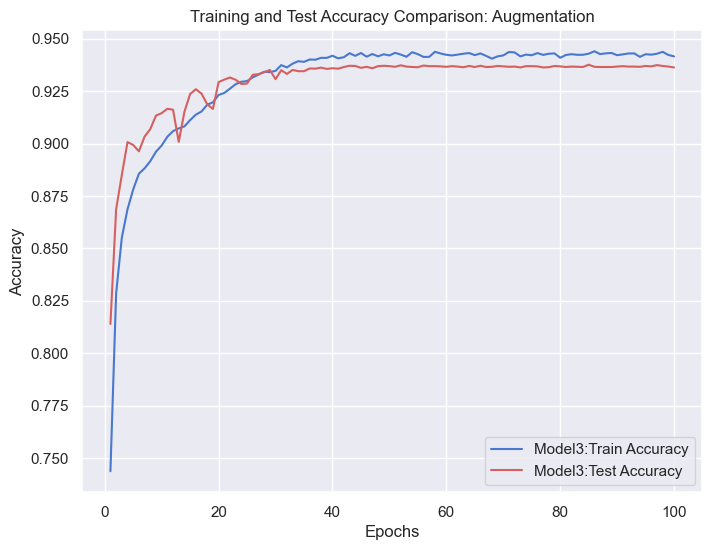

In [173]:
# Plot comparison chart

train_accuracy_model3 = model3_history.history['acc']
test_accuracy_model3 = model3_history.history['val_acc']


# Plot the chart
plt.figure(figsize=(8, 6))
epochs = range(1, len(train_accuracy_model3) + 1)
plt.plot(epochs, train_accuracy_model3, 'b', label='Model3:Train Accuracy')
plt.plot(epochs, test_accuracy_model3, 'r', label='Model3:Test Accuracy')
plt.title('Training and Test Accuracy Comparison: Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

<font size="3"> 
    
The training and testing accuracy demonstrate a gradual increase until approximately 40 epochs, after which they almost stabilize with some fuctuations. Notably, the testing accuracy did not rise as smoothly as the training accuracy until the 40th epoch, whereas the training accuracy exhibited slight fluctuations throughout the entire 100 epochs. There was some evidence of overfitting, as slight difference in the accuracies.

Ultimately, the model achieved a final test accuracy of 93.82% as opposed to training accuracy of 94.24%.
    
</font>

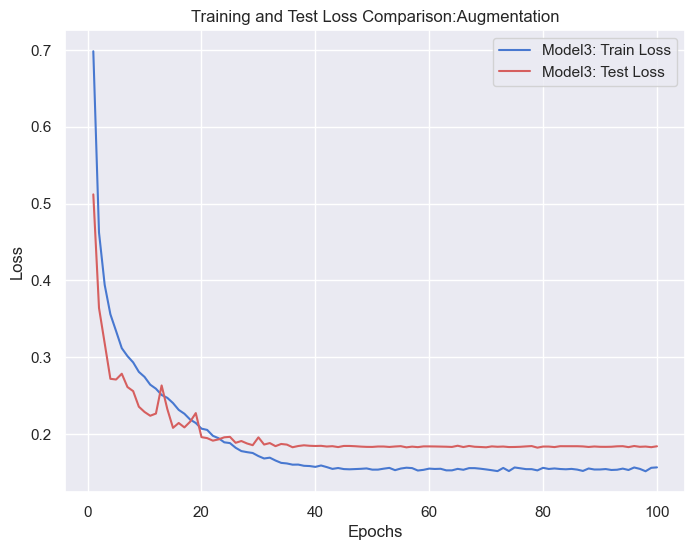

In [174]:
# Plot comparison chart
train_loss_model3 = model3_history.history['loss']
test_loss_model3 = model3_history.history['val_loss']

# Plot the chart
plt.figure(figsize=(8, 6))
epochs = range(1, len(train_loss_model3) + 1)
plt.plot(epochs, train_loss_model3, 'b', label='Model3: Train Loss')
plt.plot(epochs, test_loss_model3, 'r', label='Model3: Test Loss')
plt.title('Training and Test Loss Comparison:Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

<font size="3"> 
    
The training and test loss exhibited a similar pattern as the accuracy. The test loss reached a value of 0.1768 and remained approximately constant after 40 epochs. Towards the end, specifically after 20 epochs, the training loss was slightly lower than the test loss. 
    
</font>

## COMPARING MODEL1, MODEL2, AND MODEL3

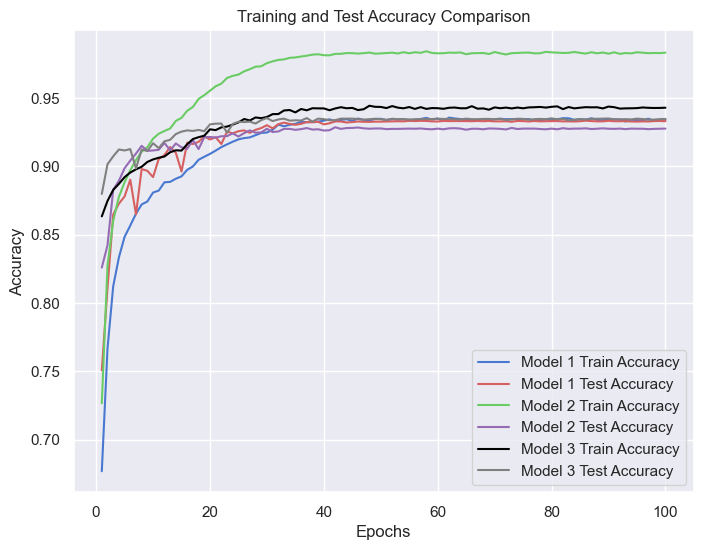

In [138]:
## Comparing model accuracies
plt.figure(figsize=(8, 6))
epochs1 = range(1, len(train_accuracy_model1) + 1)
epochs2 = range(1, len(train_accuracy_model2) + 1)
epochs3 = range(1, len(train_accuracy_model3) + 1)

plt.plot(epochs1, train_accuracy_model1, 'b', label='Model 1 Train Accuracy')
plt.plot(epochs1, test_accuracy_model1, 'r', label='Model 1 Test Accuracy')

plt.plot(epochs2, train_accuracy_model2, 'g', label='Model 2 Train Accuracy')
plt.plot(epochs2, test_accuracy_model2, 'm', label='Model 2 Test Accuracy')

plt.plot(epochs3, train_accuracy_model3, 'black', label='Model 3 Train Accuracy')
plt.plot(epochs3, test_accuracy_model3, 'gray', label='Model 3 Test Accuracy')


plt.title('Training and Test Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

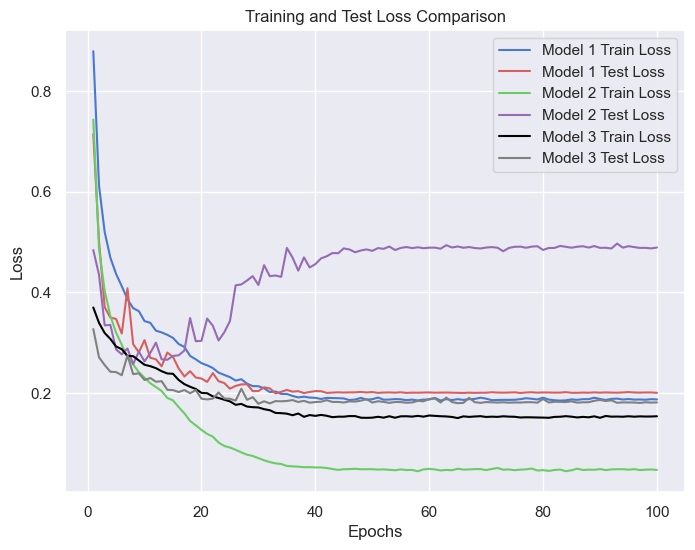

In [139]:
## Comparing model accuracies
plt.figure(figsize=(8, 6))
epochs1 = range(1, len(train_loss_model1) + 1)
epochs2 = range(1, len(train_loss_model2) + 1)
epochs3 = range(1, len(train_loss_model3) + 1)

plt.plot(epochs1, train_loss_model1, 'b', label='Model 1 Train Loss')
plt.plot(epochs1, test_loss_model1, 'r', label='Model 1 Test Loss')

plt.plot(epochs2, train_loss_model2, 'g', label='Model 2 Train Loss')
plt.plot(epochs2, test_loss_model2, 'm', label='Model 2 Test Loss')

plt.plot(epochs3, train_loss_model3, 'black', label='Model 3 Train Loss')
plt.plot(epochs3, test_loss_model3, 'gray', label='Model 3 Test Loss')


plt.title('Training and Test Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

<font size="3"> 
    
Model 2, which lacks data augmentation, performs poorly compared to the other models in terms of both accuracy and loss. It exhibits clear signs of overfitting, as evidenced by the increasing loss during training.

Model 1 shows a small accuracy and loss gap between the training and testing phases, indicating a good generalization performance. It seems to handle overfitting well and has a balanced performance on both the training and testing datasets.

Model 3 initially achieves higher accuracy for both training and testing datasets and concludes with a minimal difference of 0.9% between the two accuracies.

Considering these observations, both Model 1 and Model 3 are strong contenders. However, for subsequent prediction purposes, it is recommended to choose Model 1 due to its superior generalization performance and smaller accuracy gap between the training and testing phases. This suggests that Model 1 is less likely to overfit to the training data and should perform well on new, unseen data, making it a more reliable choice for practical use.
    
</font>

## MODEL PREDICTIONS

In [204]:
print(model1.predict(X_train))

1875/1875 [==============================] - 10s 5ms/step
[[4.54129979e-13 4.34628129e-22 5.68254818e-12 ... 5.29045165e-02
  3.03271748e-11 9.46898401e-01]
 [9.99999523e-01 0.00000000e+00 3.54211625e-11 ... 0.00000000e+00
  6.01784005e-27 0.00000000e+00]
 [8.73620391e-01 3.46844845e-11 5.22396585e-04 ... 7.00462178e-24
  1.34602161e-07 1.99100228e-19]
 ...
 [6.47624765e-05 1.88397576e-06 2.59772150e-05 ... 2.96831190e-32
  2.65702660e-08 3.18037933e-26]
 [9.99194801e-01 3.42640827e-24 1.34996935e-05 ... 0.00000000e+00
  1.41266556e-13 6.30048327e-35]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.03137771e-35
  0.00000000e+00 0.00000000e+00]]


In [205]:
# Created a probability model for prediction
probability_model = tf.keras.Sequential([model1, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


<font size="3"> 
    
Make predictions with the model1 
    
</font>

In [206]:
# Predict the index zero
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.2319693 ],
      dtype=float32)

<font size="3"> 
    
A prediction is an array of 10 numbers. They represent the model’s confidence that the image corresponds to each of the 10 different articles of clothing.
    
</font>

In [207]:
# the argmax of index zero
np.argmax(predictions[0]) # Predicted class 

9

In [208]:
y_test[17] # Actual class

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [209]:
# Retrieve the first image in the train dataset and normalize it
image_index = 0
img = X_train[image_index]
img = img/255.0

<font size="3"> 
    

Convert the one-hot encoded labels (y_train and y_test) into their original class labels

</font>



In [210]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

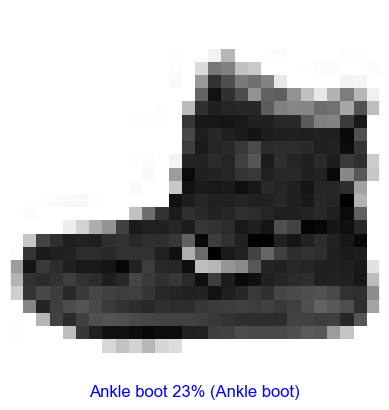

In [211]:
# Compare predicted label with actual label

def plot_image(i,predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                          100*np.max(predictions_array),
                                          class_names[true_label]),
                                          color=color)
    
plot_image(0, predictions[0], y_train[image_index], img)

<font size="3"> 
    
Verify predictions with the first image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage for the predicted label.
    
</font>

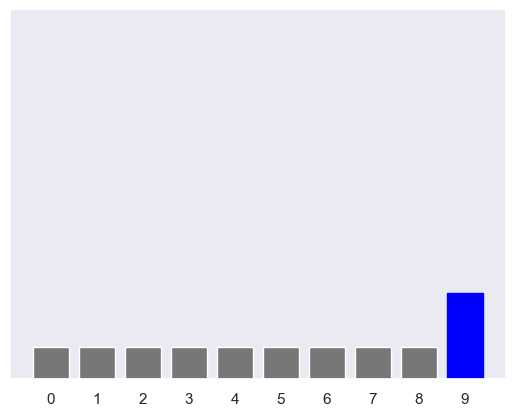

In [212]:
# Predicted class with true class check 

def plot_value_array(i, predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    myplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    myplot[predicted_label].set_color('red')
    myplot[int(true_label)].set_color('blue')

plot_value_array(0, predictions[0], y_train[image_index])

<font size="3"> 

This is used to visualize the bar chart representing the predicted probabilities of each class for a given image. It also highlights the predicted class and the true class with different colors.
    
</font>

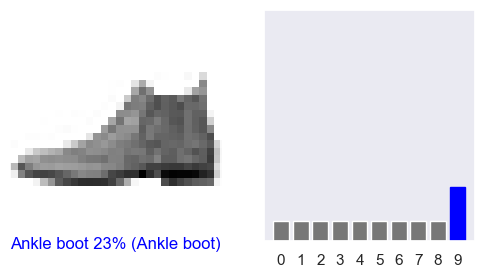

In [213]:
# Plot first image and predicted probability 

i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], y_test[i], X_test[i])
plt.subplot(1, 2, 2)
plot_value_array (i, predictions[i], y_test[i])

plt.show()


<font size="3"> 
    
This creating a visualization for the first image and its corresponding predicted probabilities generated by the model.
    
</font>

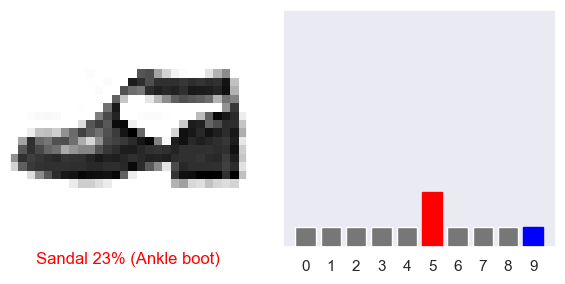

In [214]:
# Plot 18th image and predicted probability 

i = 23
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], y_test[i], X_test[i])
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], y_test[i])
plt.tight_layout()
plt.show()

<font size="3"> 

This visualization of the 23rd image in the dataset along with the associated predicted probabilities that the model has generated. The model's prediction for this specific image is belongs to class 5, which diverges from the original classification of the image which is class 9. 

</font>

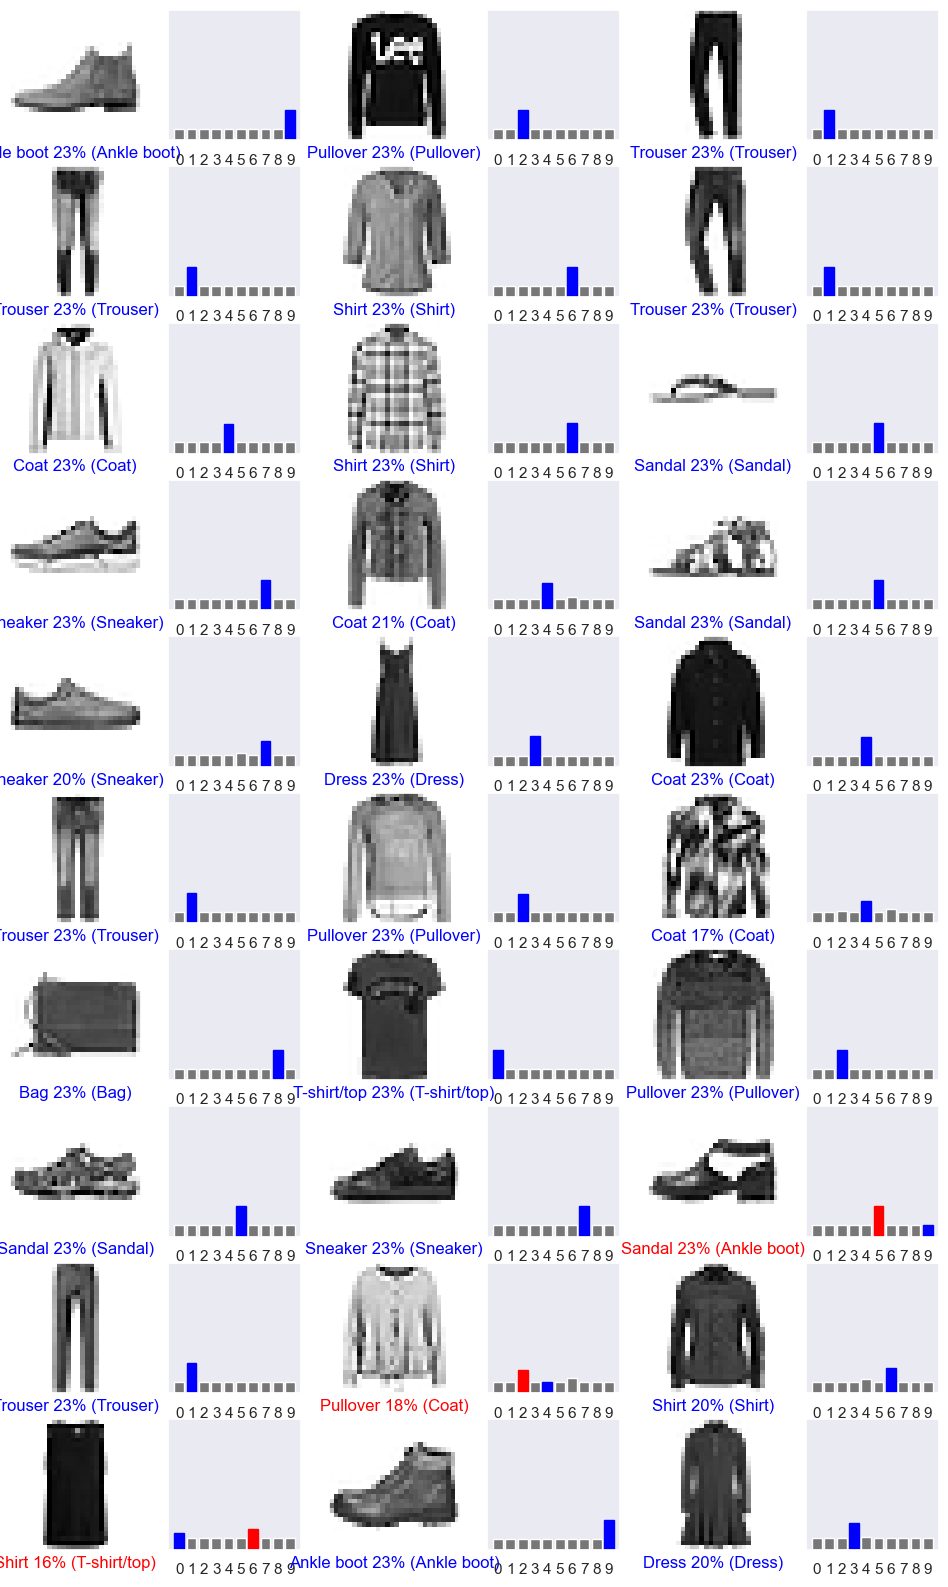

In [215]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 10
num_cols = 3
num_images = num_rows*num_cols # Image print array

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test[i], X_test[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test[i])

plt.show()

<font size="3"> 
    
This creates a visualization grid for multiple images, their corresponding predicted labels, and the predicted probabilities for each class.
    
</font>

In [216]:
# Check the image shape from the test dataset.
img = X_test[1]

print(img.shape)

(28, 28, 1)


In [217]:
img = (np.expand_dims(img, 0) / 255.0)  # Reshape and normalize the image
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[0.08542804 0.08542791 0.08542791 0.08542803 0.08542791 0.23052078
  0.08542791 0.08552262 0.0859552  0.08543368]]


<font size="3"> 
    
With the model, obtain predicted probabilities for each class to see the model's confidence in its prediction for the given image.
    
</font>    

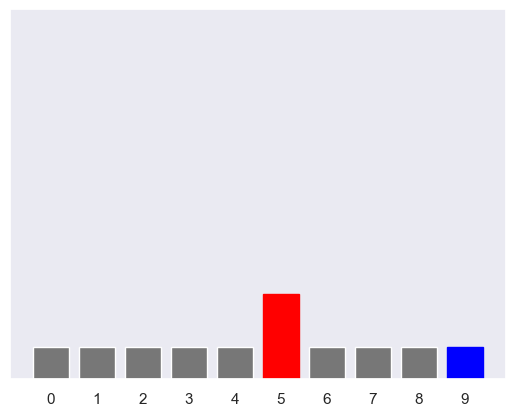

In [218]:
def plot_value(i, predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    myplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    myplot[int(predicted_label)].set_color('red')
    myplot[int(true_label)].set_color('blue')  # Convert true_label to an integer
    
plot_value(1, predictions_single[0], y_train[image_index])

<font size="3"> 

In the bar chart,each bar represents the probability of the image belonging to the respective class label. The bar corresponding to the predicted class will be displayed in red, and the bar corresponding to the true class will be displayed in blue.
    
</font> 

In [109]:
np.argmax(predictions_single[0])

5

## MODEL EVALUATION

In [233]:
# Convert predicted image to class names
y_pred_names = model1.predict(X_test) # Model prediction

y_pred = [] 
for i in y_pred_names:
    pred_index = np.argmax(i) # Obtain high probability index 
    try:
        class_label = class_names[pred_index]
        y_pred.append(class_label)
    except IndexError:
        print(f"Invalid label index: {pred_index}")
        y_pred.append("Unknown")


313/313 [==============================] - 2s 7ms/step


In [232]:
# Print unique y_pred labels
y_pred_labels = list(set(y_pred))
y_pred_labels


['Coat',
 'Pullover',
 'Sandal',
 'Trouser',
 'Shirt',
 'Sneaker',
 'Ankle boot',
 'Dress',
 'Bag',
 'T-shirt/top']

In [221]:
# Convert y_test class to class names
y_test = [class_names[label] for label in y_test]

In [231]:
# Print y_test unique labels 
y_test_labels = list(set(y_test))
y_test_labels


['Coat',
 'Pullover',
 'Sandal',
 'Trouser',
 'Shirt',
 'Sneaker',
 'Ankle boot',
 'Dress',
 'Bag',
 'T-shirt/top']

In [224]:
# Create confusion matrix
# Import classification matrices
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

predictions = y_pred

# Performance matrics
#conf_matrix = confusion_matrix(wine_class, wine_cluster)
conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1_sc = f1_score(y_test, predictions, average='micro')
classification_rep = classification_report(y_test, predictions)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", round(accuracy,2))
print("Precision (micro-averaged):", round(precision,2))
print("Recall (micro-averaged):", round(recall,2))
print("F1 Score (micro-averaged):", round(f1_sc,2))
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[963   0   0   0   0   6   0  31   0   0]
 [  0 992   0   2   1   1   1   1   1   1]
 [  0   0 894  17  28   0  61   0   0   0]
 [  0   1  25 933   9   0  26   0   4   2]
 [  0   0  34   7 898   0  49   0  11   1]
 [  5   0   0   0   0 991   0   4   0   0]
 [  0   3  62  20  29   0 821   0  63   2]
 [ 12   0   0   0   0   6   0 982   0   0]
 [  0   8   0  15  10   0 123   0 844   0]
 [  0   1   0   6   0   0   3   0   0 990]]
Accuracy: 0.93
Precision (micro-averaged): 0.93
Recall (micro-averaged): 0.93
F1 Score (micro-averaged): 0.93
Classification Report:
               precision    recall  f1-score   support

  Ankle boot       0.98      0.96      0.97      1000
         Bag       0.99      0.99      0.99      1000
        Coat       0.88      0.89      0.89      1000
       Dress       0.93      0.93      0.93      1000
    Pullover       0.92      0.90      0.91      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.76      0.82    

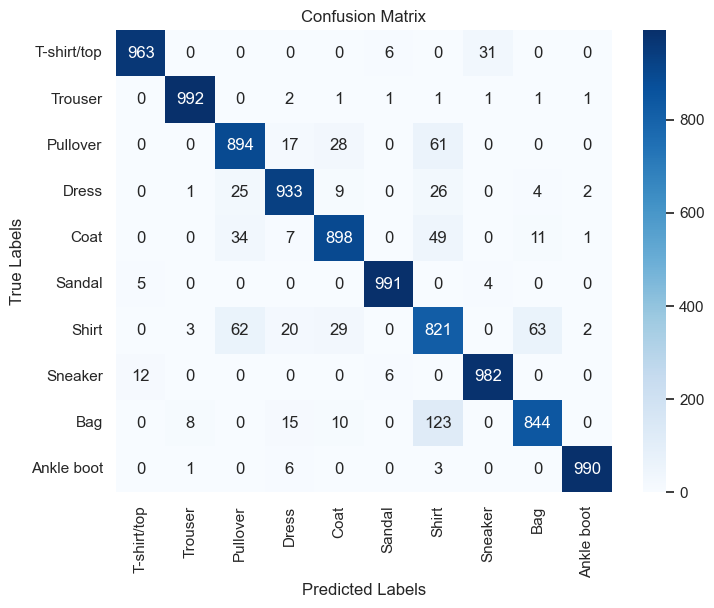

In [237]:

# Plot confusion matrix in the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<font size="3"> 

The confusion matrix displays how actual classes were predicted as other classes. Diagonal elements signify the correct predictions.

Accuracy: 0.93
    
Accuracy measures the correct predictions out of total samples. In this case, the model achieved 93% accuracy, correctly labeling 93% of test samples.

Precision (micro-averaged): 0.93
    
Precision measures correctly predicted positives relative to total predicted positives.

Recall (micro-averaged): 0.93
    
Recall gauges correctly predicted positives against total actual positives.

F1 Score (micro-averaged): 0.93
    
The F1 score balances precision and recall. 

This model performs well with high accuracy, good precision, recall, and F1-score. 
    
</font>


# SUMMARY

<font size="3"> 


The Fashion MNIST data analysis started with data exploration, understanding its shape, pixel size, and grayscale nature. Visualizations were created using seaborn and matplotlib to examine intensity distributions on a 0-255 scale. In the data preprocessing phase, scaling and one-hot encoding were applied.Moreover, data augmentation was used to increase dataset variability and optized learning rate to eliminate overfitting.

A group of  seven CNN architectures were tested prior to selecting models for training. Threafter, two CNN architectures developed with varying combinations of filters, kernel sizes, batch normalizations, max pooling, and dropouts. Both models were trained with different batch sizes as when smaller batches resulting in increased training time. During training, optimization techniques and learning rate reductions were employed at different intervals.

The performance of each model varied in terms of accuracy and loss. Model 2, without augmentation, performed poorly and exhibited overfitting during training.

Model 1 emerged as the best performer, displaying superior accuracy, lower loss, and no overfitting issues. Model 3 also performed well, showing a slight gap between training and testing accuracies. The Model 1 had a test accuracy of 93% with  test loss of 0.2, indicating its predictions were close to the actual labels and demonstrated good performance on unseen data.

Therefore, Model 1 was selected for final predictions due to its consistent performance throughout the training process, successfully classifying clothing items into their respective categories on unseen test data.

Overall, the analysis showcased the effectiveness of the chosen CNN architecture in accurately classifying fashion items in the Fashion MNIST dataset. The high test accuracy and low test loss suggest the model learned meaningful features from the images, leading to accurate predictions on new data.


References : https://www.kaggle.com/code/cdeotte/how-to-choose-cnn-architecture-mnist
    
https://complex-valued-neural-networks.readthedocs.io/en/stable/code_examples/fashion_mnist.html
    
    
</font>